In [37]:
import pandas as pd
pd.options.display.max_columns = 100
import json, itertools
import time
import numpy as np
import matplotlib.pyplot as plt
import utils as ut
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from stop_words import get_stop_words
import random

# Compiling text per member

Process is very similar to counting words. We will then make a word cloud per person.

Importing a json file containing a map between active PersonNumber's and PersonIdCode's

In [2]:
with open('data/active_PersonNumber_PersonIdCode_map.json') as data_file:
    person_map = json.load(data_file)
    
active_ids = list(person_map.values())
active_ids.sort()
active_numbers = list(person_map.keys())
active_numbers.sort()

Importing info about the parliament members

In [3]:
mmbr = pd.read_csv('data/MemberCouncil.csv')
# the ppl DataFrame will be useful to map PersonNumber to PersonIdCode
ppl = pd.read_csv('data/Person.csv').dropna(axis=0, subset=['PersonNumber', 'PersonIdCode'])

Importing a cleaned version of the transcripts containing no NaN on either PersonNumber or Text

In [4]:
transc = pd.read_csv('data/transcript_clean.csv').drop('Unnamed: 0', axis=1)

We will store the text in a dictionary

In [5]:
text_dict = {}
for i in active_ids:
    text_dict[i] = ''

In [6]:
len('')

0

In [7]:
for row in transc.iterrows():
    row = row[1]
    #print(row['PersonNumber'])
    if str(row['PersonNumber']) in active_numbers:
        this_id = person_map[str(row['PersonNumber'])]
        text = ut.to_text(row['Text'])
        base = text_dict[this_id]
        if len(base) > 0:
            text_dict[this_id] += ' '+text
        else:
            text_dict[this_id] += text

In [8]:
with open('data/compiled_text.json', 'w') as outfile:
    json.dump(text_dict, outfile)

In [50]:
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(70, 100)

In [15]:
clean_text = text_dict[2023]

In [30]:
good_text = ' '.join([w for w in clean_text.split() if len(w) > 5])

In [31]:
stops = get_stop_words('fr')

In [27]:
good_text = ' '.join([w for w in good_text.split() if w not in stops])

In [32]:
good_text

'commission l\'honneur pouvoir délibérer propositions, puisque utilise particularité règlement, n\'existe Berne, c\'est-à-dire possibilité modifier n\'importe article figurent projet présenté. plupart cantons interdisent pratique peut-être, d\'aujourd\'hui, ont-ils raison. concerne l\'objet lui-même, serait singulier, m\'exprimer personnel modifications importance aucune consultation cantons organisations d\'habitude consultés. serait innovation dorénavant, chaque changerait article pourrait profiter l\'occasion réviser passage, consultation. mauvaise politique pratique fédéral démocratie directe représentative chaque consulter largement milieux concernés. circulation routière aujourd\'hui, pensant parlions article, puissent opinion, l\'article alinéa circulation routière suivante: piétons traverseront chaussée prudence chemin empruntant, possible, passage piétons. bénéficient priorité passages, doivent lancer l\'improviste." proposition Flückiger prévoit ajouter: doivent manifester in

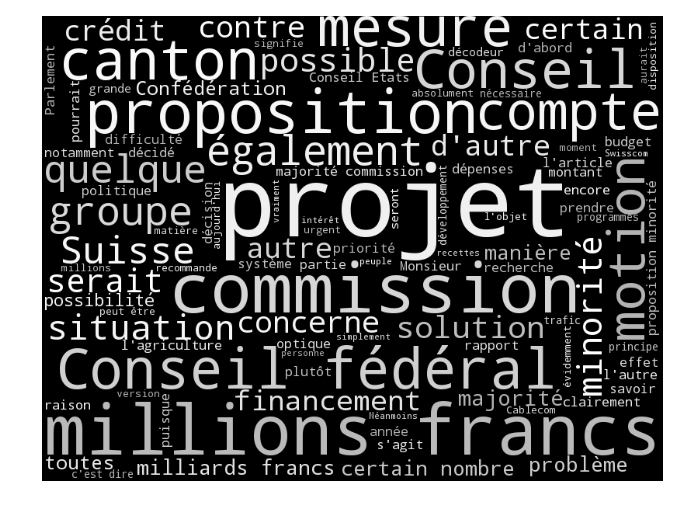

In [61]:
wc = WordCloud(width=800, height=600, max_words=100)
wc.generate(good_text)
fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(wc.recolor(color_func=grey_color_func, random_state=3))
ax.axis("off")
plt.savefig('wc/test.jpg', bbox_inches='tight')
plt.show()


In [ ]:
B = df.replace(0, np.nan).drop([49, 3, 4, 5, 59], axis=1)
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(B, interpolation="none")

plt.show()